<a href="https://colab.research.google.com/github/Subhajit53/Teleom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#<b>Introduction
#####"We see our customers as invited guests to a party, and we are the hosts. It's our job everyday to make every important aspect of the customer experience a little better."
##### The above quote, given by Jeff Bezos, founder and CEO of Amazon, tells a lot about customer retention in this competitive world. If you don't serve your customers well, there are many hungry companies to take away that bite from your mouth.
##### That's why, customer retention has been one of the chief goals of any customer serving company. Unsatisfied customers not only make loss to the business, but also creates a negative impression in the market.
##### And in this telecom dependent era, there are a lot of emerging companies to give a tough competition to any other existing telecom industry whether it is in pricing, data speed, call connectivity, international charges and all.
##### There might be several factors affecting customer churn for a specific company. Naturally, Orange S.A. also wants to find out what reasons are causing its customers to leave their services. And by finding that out, it can take precautious measures to retain its customers.

#<b> The Talking Data </b>
##### Understanding the data is the first step towards any analysis. Without having an idea of what we have in our plates, we can't proceed a step. The data in question here have 20 columns and 3333 rows. Although no data dictionary was provided with the dataset, let's try to figure out what features our dataset have.
1. <b> State: </b> State in which the customer lives in.
2. <b> Account Length: </b> For how many days the customer is using the service.
3. <b> Area Code: </b> An identifier to the area the customer lives in.
4. <b> International plan: </b> A binary identifier to whether the customer has opt for an international plan.
5. <b> Voice mail plan: </b> A binary identifier to whether the customer has opt for a voice mail plan.
6. <b> Number vmail messages: </b> Number of voicemail messages sent or received.
7. <b> Total day minutes: </b> How much the customer have talked over phone in the daytime.
8. <b> Total day calls: </b> How many calls the customer have made over phone in the daytime.
9. <b> Total day charge: </b> How much money was charged to the customer in the daytime.
10. <b> Total eve minutes: </b> How much the customer have talked over phone in the evening.
11. <b> Total eve calls: </b> How many calls the customer have made over phone in the evening.
12. <b> Total eve charge: </b> How much money was charged to the customer in the evening.
13. <b> Total night minutes: </b> How much the customer have talked over phone in the night.
14. <b> Total night calls: </b> How many calls the customer have made over phone in the night
15. <b> Total night charge: </b> How much money was charged to the customer in the night.
16. <b> Total intl minutes: </b> How much the customer have talked over phone internationally.
17. <b> Total intl calls: </b> How many calls the customer have made over phone internationally.
18. <b> Total intl charge: </b> How much money was charged to the customer for international calls.
19. <b> Customer service calls: </b> How many service calls were made to the customer.
20. <b> Churn: </b> A binary identifier to whether the customer has churned or not.

# <b> Approach </b>
Before proceeding to the main analysis part, let us discuss how we are going to approach the given problem.

#### <b> 1. Data Cleaning: </b>
##### The first and most crucial task for analysing a data is to clean it first. A messy data can give messy outputs. As we are not currently feeding the data to any ML model, we shall only check on null values and unrealistic values. We shall make a conclusion about outliers while doing the analysis.
#### <b> 2. Univariate Analysis: </b>
##### We shall make some plots and try to conclude about each possible variable individually.
#### <b> 3. Bivariate Analysis: </b>
##### We shall make some plots and try to conclude about pairs of variables. We can also assess relations between the Churn variable and other variables.
#### <b> 4. Multivariate Analysis: </b>
##### We shall make a correlation heatmap and try to make conclusions about magnitude of relationship between Churn and other variables.

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <b> Reading the dataset and exploring it

In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telecom Churn Analysis Notebook/Telecom Churn.csv')

In [6]:
# Let's see how the data looks like
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
telecom_df.shape

(3333, 20)

In [9]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### <b>1. Data Cleaning: </b>
##### While exploring the data, we saw that our dataframe has 3333 observations and all the columns have 3333 non-null values. Hence we are free of any headache to deal with the demonic nulls!
##### Now again, with the describe() method, we saw that the numerical columns have no unrealistic values!
##### It seems that the data is a very good boy and showed some mercy to us by lessening our work! Now it's time to bind the data in chairs and beat it until it spits out some information to us.
##### Sorry data! Being a good boy doesn't always help!

### <b>2. Univariate Analysis: </b>
##### Now it's time to take our first step towards understanding the data. Let's see what it had been hiding from us! We shall form each chunk with these parts : Question, Analysis, Conclusion.


#### <b> Question:
##### <b> How are the customers distributed throughout states?

#### <b> Analysis:

Text(0, 0.5, 'Number of Customers')

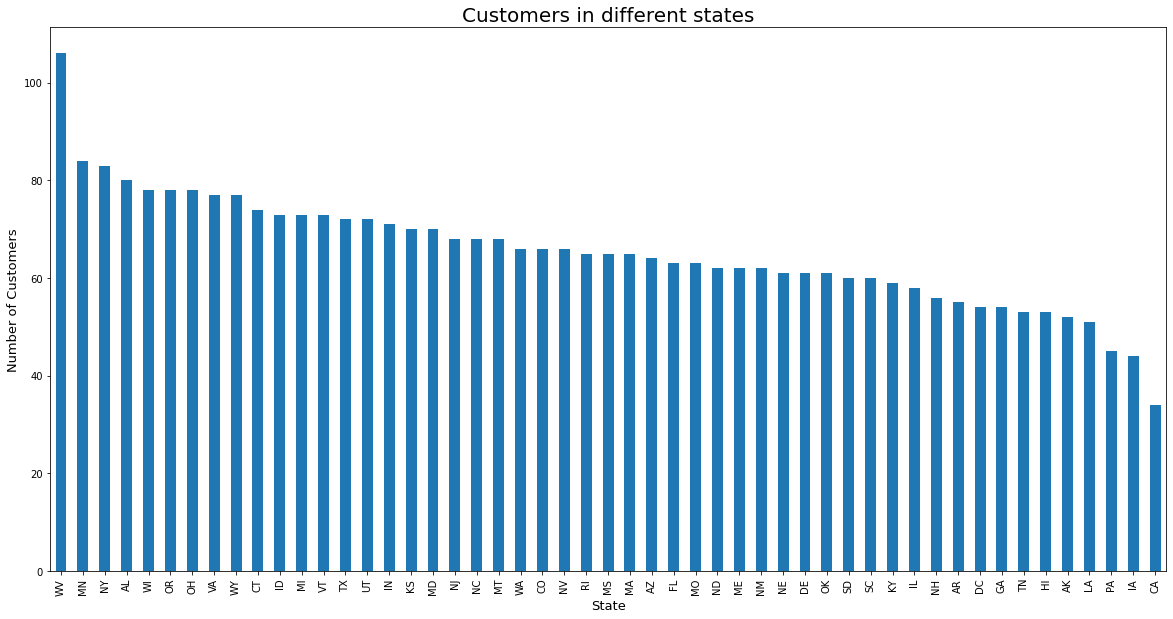

In [26]:
plt.rcParams['figure.figsize'] = (20,10)

telecom_df['State'].value_counts().plot(kind = 'bar')
plt.title('Customers in different states', size = 20)
plt.xlabel('State', size = 13)
plt.ylabel('Number of Customers', size = 13)

#### <b> Conclusion: </b>
1. WV has highest number of customers and CA has lowest number of customers.
2. Except for WV, PA, IA, CA, the other states don't deviate so much in case of having customers.

#### <b> Question:
##### <b> How Account Length of customers is distributed?

#### <b> Analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Account Length')

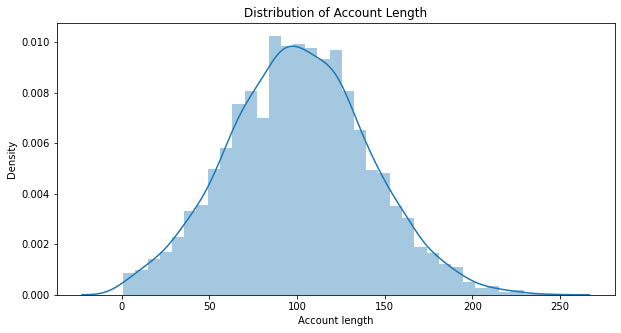

In [27]:
plt.rcParams['figure.figsize'] = (10,5)
sns.distplot(telecom_df['Account length'], hist = True)
plt.title('Distribution of Account Length')

#### <b> Conclusion: </b>
1. Account length of customers have an almost Normal Distribution.

#### <b> Question:
##### <b> How the customer distribution is in different areas?

#### <b> Analysis:

Text(0, 0.5, 'Number of Customers')

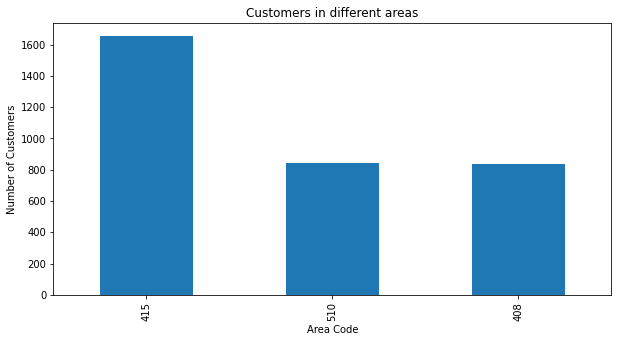

In [21]:
plt.rcParams['figure.figsize'] = (10,5)

telecom_df['Area code'].value_counts().plot(kind = 'bar')
plt.title('Customers in different areas')
plt.xlabel('Area Code')
plt.ylabel('Number of Customers')

#### <b> Conclusion: </b>
1. The area with code 415 has most number of customers.
2. The areas with codes 408 and 510 have almost half number of customers than the area 415.

#### <b> Question:
##### <b> How the customers are opting for international plan and voice plan?

#### <b> Analysis:

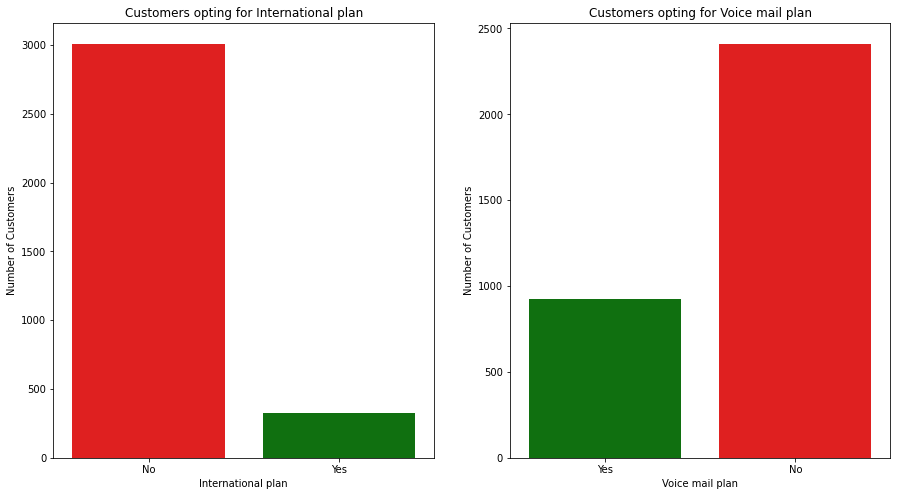

In [36]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(data = telecom_df, x = 'International plan', palette=['r', 'g'])
plt.title('Customers opting for International plan')
plt.ylabel('Number of Customers')

plt.subplot(1,2,2)
sns.countplot(data = telecom_df, x = 'Voice mail plan', palette=['g', 'r'])
plt.title('Customers opting for Voice mail plan')
plt.ylabel('Number of Customers')

plt.show()

#### <b> Conclusion: </b>
1. More people didn't choose to recharge with International or Voice mail plans.
2. But in case of Voice mail plan, the ratio between Yes and No is a bit higher.

#### <b> Question:
##### <b> How many calls are being made during different times of a day?

#### <b> Analysis:

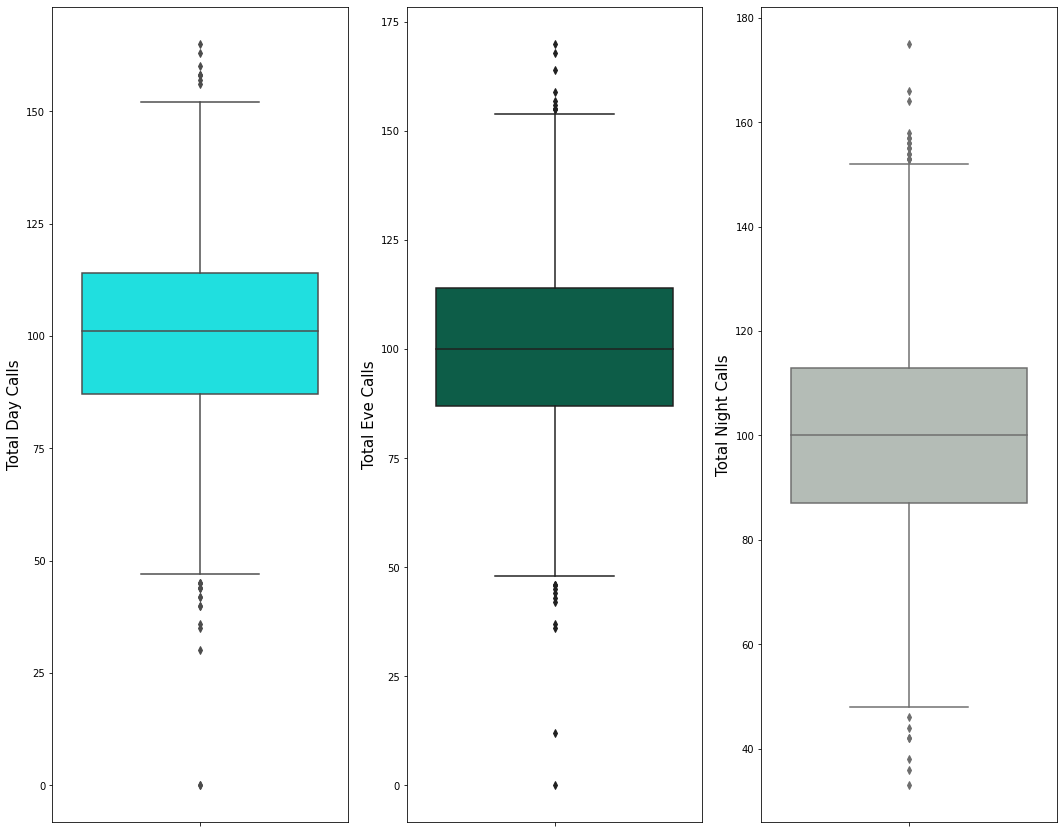

In [40]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day calls', color = '#00FFFF')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve calls', color = '#006A4E')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night calls', color = '#B2BEB5')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Most calls were made during daytime and least calls were made in the night.
2. There are few too small outlier points in Total Day Calls and Total Eve Calls and a large outlier point in Total Night Calls which need to be removed before feeding the data into an ML algorithm.

#### <b> Question:
##### <b> How much customers are talking during different times of a day?

#### <b> Analysis:

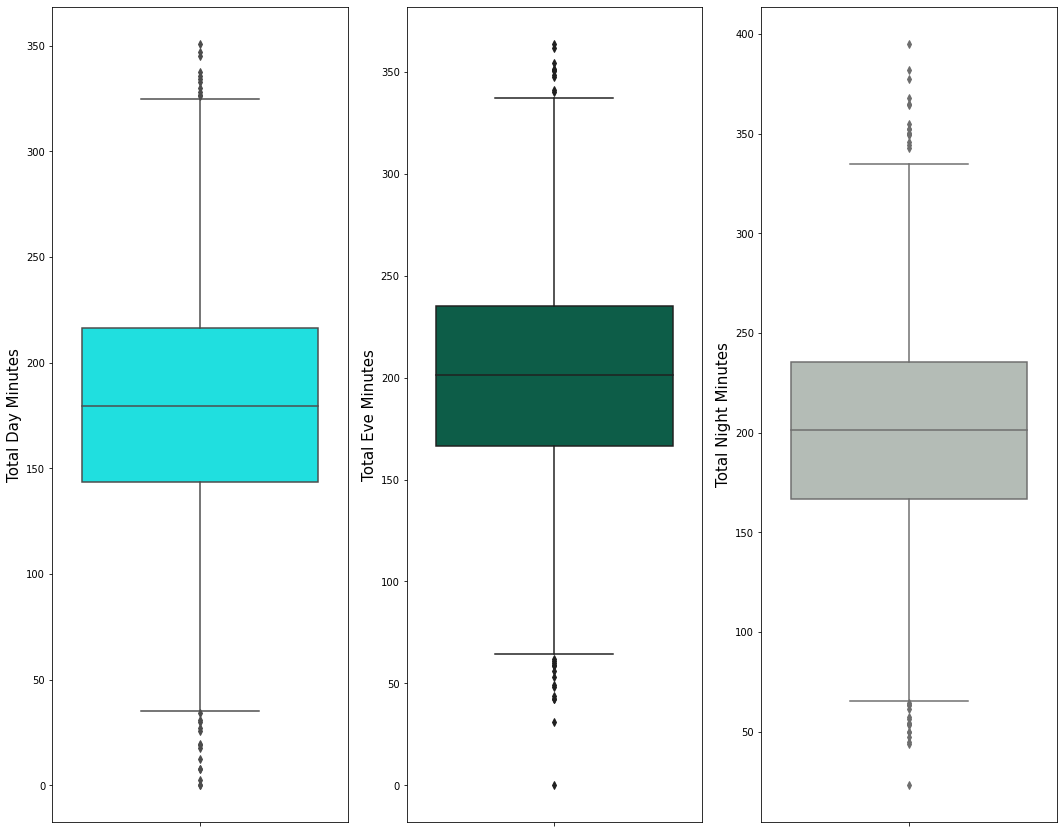

In [43]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day minutes', color = '#00FFFF')
plt.ylabel('Total Day Minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve minutes', color = '#006A4E')
plt.ylabel('Total Eve Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night minutes', color = '#B2BEB5')
plt.ylabel('Total Night Minutes', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Customers talked more during evening and less during night.
2. Despite the fact that most calls were made during the daytime, customers did not spend much time talking over phone.
3. Some outlier treatment is necessary for the extreme points in Total Eve Minutes and Total Night Minutes.

#### <b> Question:
##### <b> How much customers are paying during different times of a day?

#### <b> Analysis:

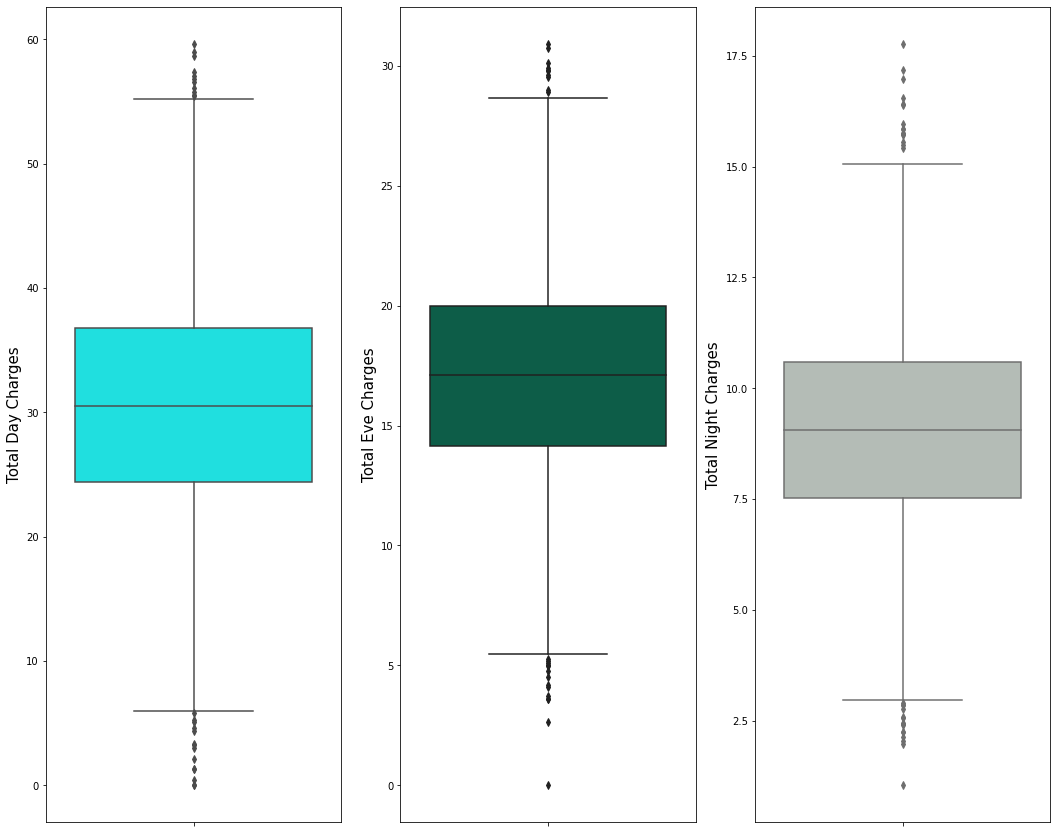

In [44]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day charge', color = '#00FFFF')
plt.ylabel('Total Day Charges', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve charge', color = '#006A4E')
plt.ylabel('Total Eve Charges', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night charge', color = '#B2BEB5')
plt.ylabel('Total Night Charges', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. The charges are maximum in the evening time and lowest in the night time.
2. These plots are in conjunction with the minutes spoken.

#### <b> Question:
##### <b> What can we say about the customers opting for International plan?

#### <b> Analysis:

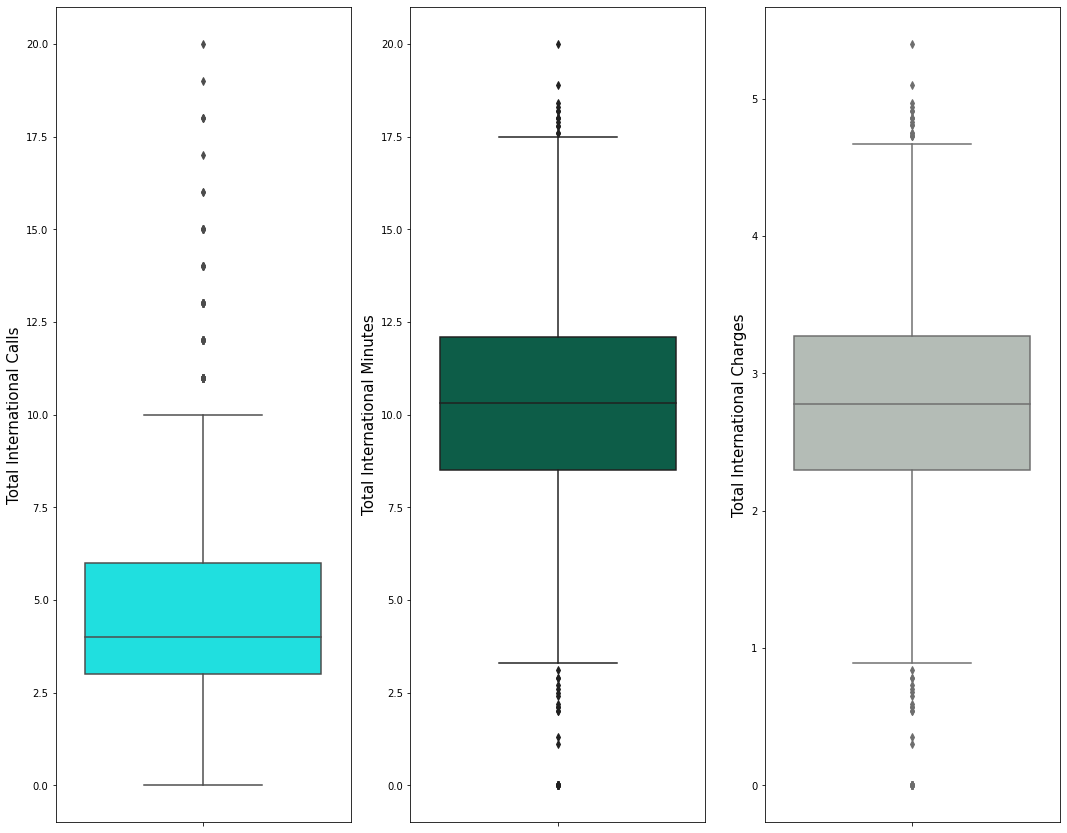

In [46]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total intl calls', color = '#00FFFF')
plt.ylabel('Total International Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total intl minutes', color = '#006A4E')
plt.ylabel('Total International Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total intl charge', color = '#B2BEB5')
plt.ylabel('Total International Charges', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Number of International calls is not well distributed.
2. Range of all three metrics are much lesser than domestic day, eve and night calls.

#### <b> Question:
##### <b> What about the main hero, Churn?

#### <b> Analysis:

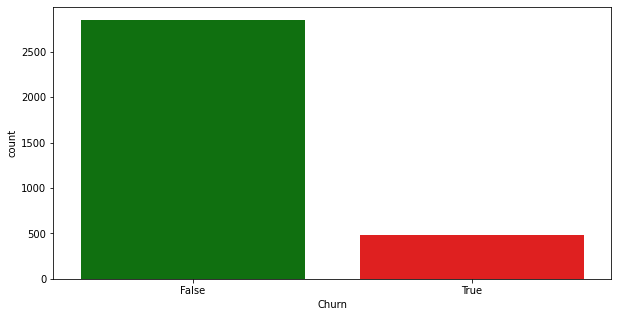

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(data = telecom_df, x = 'Churn', palette = ['g', 'r'])
plt.show()

In [59]:
round(len(telecom_df[telecom_df['Churn'] == True]) / 3333 * 100, 2)

14.49

#### <b> Conclusion: </b>
1. Almost 14.49% of total customers have left the service.